# House Prices - EDA

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PROJECT_PATH = "/".join(os.getcwd().split('/')[:-1])
DATA_PATH = os.path.join(PROJECT_PATH, 'data')
TRAIN_DATA_PATH = os.path.join(DATA_PATH, 'train.csv')

# Load the training dataset
house_prices_train = pd.read_csv(TRAIN_DATA_PATH)
house_prices_train = house_prices_train.drop('Id', axis=1)
house_prices_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Looking at the missing values

In [2]:
# Get the columns from the dataset
cols = house_prices_train.columns.tolist()

print('-------------------------')
print('Columns with missing data')
print('-------------------------')

cols_with_missing_data = []

# For each column, find the ratio of missing data
for col in cols:
    col_data = house_prices_train[col]
    missing_rows = len(col_data[col_data.isna()])
    total_rows = len(col_data)
    missing_ratio = (missing_rows / total_rows)
    
    # Anything greater than 0.0 if missing a value
    if missing_ratio > 0.0:
        cols_with_missing_data.append(col)
        print('{:16} {:.2f}%'.format(col, missing_ratio * 100))

print('-------------------------')
print('{} columns contain missing values'.format(len(cols_with_missing_data)))

-------------------------
Columns with missing data
-------------------------
LotFrontage      17.74%
Alley            93.77%
MasVnrType       0.55%
MasVnrArea       0.55%
BsmtQual         2.53%
BsmtCond         2.53%
BsmtExposure     2.60%
BsmtFinType1     2.53%
BsmtFinType2     2.60%
Electrical       0.07%
FireplaceQu      47.26%
GarageType       5.55%
GarageYrBlt      5.55%
GarageFinish     5.55%
GarageQual       5.55%
GarageCond       5.55%
PoolQC           99.52%
Fence            80.75%
MiscFeature      96.30%
-------------------------
19 columns contain missing values


Out of the 80 features we have in the dataset, 19 of them have missing data in some form.

In [3]:
house_prices_train[cols_with_missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

Out of these 19 features, 3 of them are numeric features whilst the remaining 16 are categorical features.

In [5]:
def get_feature_count_by_types(dtypes=None):
    if dtypes is None:
        raise ValueError('dtypes needs to be provided')
    return len(house_prices_train.select_dtypes(dtypes).columns)

numeric_col_count = get_feature_count_by_types(['int64', 'float64'])
object_col_count = get_feature_count_by_types(['object'])

print('Number of numeric features: ', numeric_col_count)
print('Number of categorical features: ', object_col_count)

Number of numeric features:  37
Number of categorical features:  43


In [8]:
def get_data_by_dtypes(dtypes=None):
    if dtypes is None:
        raise ValueError('dtypes needs to be provided')
    return house_prices_train.select_dtypes(dtypes)

## Correlation Matrix

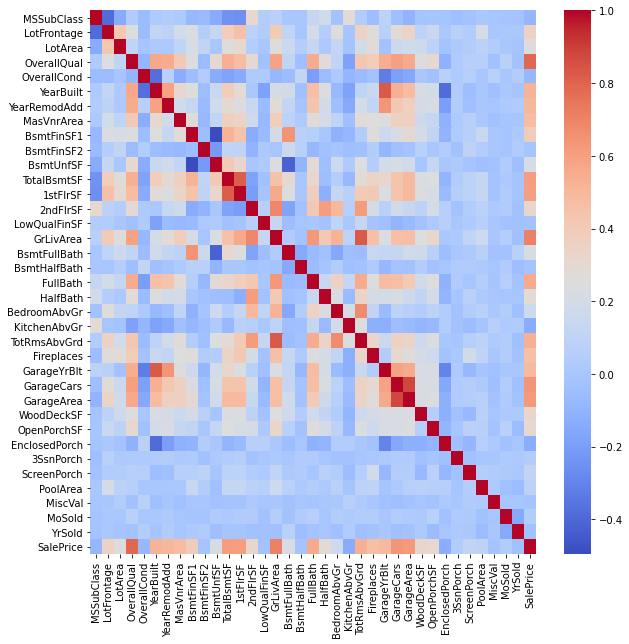

In [21]:
import seaborn as sns
corr = house_prices_train.corr()

%matplotlib inline

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

Some keys correlations seen in the heatmap
 
Positive Correlations:
* Garage Cars - Garage Area
* Year built - Garage Year built
* TotRmsAbvGrd - GrlivArea
* 1stFirSF - TotalBsmtSF
* Sale Price - Overall Quality
* Sale Price - GrLivArea
* Sale Price - Garage Cars
* Sale Price - Garage Area
* BsmtFullBath - BsmFinSF1

Negative Correlation:
* BsmtFullBath - MsmtUnfSF
* Year Built - Enclosed Porch
* MsmtFinSF1 - BsmtUnfSF

## Reducing the number of features

In [43]:
cols_to_drop = []
cols = house_prices_train.columns.tolist()
for col in cols:
    col_data = house_prices_train[col]
    num_null_records = len(col_data[col_data.isna()])
    num_reocrds = len(col_data)
    missing_ratio = num_null_records / num_reocrds
    if missing_ratio >= 0.5:
        print('{:13} {:.2f}%'.format(col, missing_ratio * 100))
        cols_to_drop.append(col)

Alley         93.77%
PoolQC        99.52%
Fence         80.75%
MiscFeature   96.30%


In [44]:
# Remove all columns that are missing over 50% of thier data
reduce_train_data = house_prices_train.drop(cols_to_drop, axis=1)
reduce_train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [51]:
object_data = reduce_train_data.select_dtypes(['object'])
object_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [55]:
ordinal_cols = [
    # 'PoolQC',
    'GarageCond',
    'GarageQual',
    'FireplaceQu',
    'KitchenQual',
    'HeatingQC',
    'BsmtFinType2', 
    'BsmtFinType1',
    'BsmtExposure',
    'BsmtCond',
    'BsmtQual',
    'ExterCond',
    'ExterQual']

In [57]:
nomial_data = object_data.drop(ordinal_cols, axis=1)
nomial_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,CBlock,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Stone,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,CBlock,GasA,Y,FuseA,Typ,Attchd,Unf,Y,WD,Normal


In [94]:
# Remove any nomial columns that have a single value

nomial_data.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
Foundation        6
Heating           6
CentralAir        2
Electrical        5
Functional        7
GarageType        6
GarageFinish      3
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

Every feature in the dataset has at least 2 categories, so we will keep all of these

https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/

## Create a basic pipeline

In [88]:
numeric_cols = reduce_train_data.select_dtypes(['float64', 'int64'])
nomial_cols = nomial_data.columns.to_list()

In [89]:
from sklearn.base import TransformerMixin

class FeatureExtractor(TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.cols]